In [1]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/j7zymbjelxlf4v5meujq32s27bbirf')
df=df[df['which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence']>0.4]
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,which_of_these_sentiment_scores_does_the_above_image_fit_into_best,which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence,imageurl,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0,694550568,True,golden,47,NaN,Positive,0.6395,http://farm1.staticflickr.com/20/71235476_3103...,Highly positive\nPositive,"He is smiling. => happy, joy"
1,694550569,True,golden,36,NaN,Positive,0.6458,http://farm4.staticflickr.com/3096/2584485524_...,Highly positive\nPositive,A beautiful scenery. => serenity
2,694550570,True,golden,35,NaN,Negative,0.8420,http://farm3.staticflickr.com/2880/11733997835...,Negative\nHighly negative,"They look serious. => sadness, fear"
3,694550571,True,golden,41,NaN,Positive,0.7216,http://farm4.staticflickr.com/3022/2286937150_...,Highly positive\nPositive,"A cute puppy. => happy, joy"
4,694550572,True,golden,46,NaN,Positive,0.8801,http://farm1.staticflickr.com/163/357381033_d0...,Highly positive\nPositive,"She looks fun. => fun, joy, happy"


In [2]:
import os
labels=df['which_of_these_sentiment_scores_does_the_above_image_fit_into_best'].unique()
os.mkdir('/content/images')
directories=['train','valid','test']
for directory in directories:
  os.mkdir('/content/images/'+directory)
  for j, label in enumerate(labels):
    os.mkdir('/content/images/'+directory+'/'+str(j))

In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f1e2c2e3265db9e0f5ebe3d7a30fc64d5d52408d0669ff25c49850e6cde4808d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
import threading
import wget

def download_img(url,directory,label,i):
  try:
    wget.download(url, '/content/images/'+directory+'/'+label+'/img'+i+'.jpg', )
  except:
    pass
for i, label in enumerate(labels):
  urls = df[df['which_of_these_sentiment_scores_does_the_above_image_fit_into_best']==label]['imageurl']
  n1_split=int(len(urls)*0.8)
  n2_split=int(len(urls)*0.95)
  n=0
  for j, url in enumerate(urls):
    if n<n1_split:
      directory=directories[0]
    elif n<n2_split:
      directory=directories[1]
    else:
      directory=directories[2]
    threading.Thread(target=download_img, args= (url,directory,str(i),str(j),)).start()
    n+=1

In [5]:
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

TRAIN_DATA_PATH = "/content/images/train/"
VALID_DATA_PATH = "/content/images/valid/"
TEST_DATA_PATH = "/content/images/test/"
DATA_TRANSFORM = transforms.Compose([
                 transforms.Resize((224, 224)),
                 transforms.Grayscale(3),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])
BATCH_SIZE = 16
train_data=datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=DATA_TRANSFORM)
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_data=datasets.ImageFolder(root=VALID_DATA_PATH, transform=DATA_TRANSFORM)
valid_dl = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=True)
X_valid, Y_valid = iter(valid_dl).next()
test_data=datasets.ImageFolder(root=TEST_DATA_PATH, transform=DATA_TRANSFORM)
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)
X_test, Y_test = iter(train_dl).next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


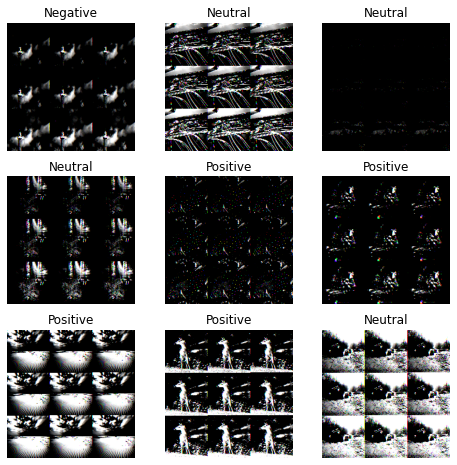

In [6]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(labels[Y_test[i]])
    plt.axis("off")
    plt.imshow(X_test[i].reshape(224,224,3))
plt.show()

In [7]:
import torch
import torchvision
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torchvision.models.resnet152(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
for p in model.parameters():
    p.requires_grad = False

out_dim = 5

model.fc = torch.nn.Sequential(
  torch.nn.Linear(model.fc.in_features, out_dim)
)


model.load_state_dict(model.state_dict())

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
LEARNING_RATE = 0.005
WEIGHT_DECAY = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
criterion = torch.nn.CrossEntropyLoss()

In [10]:
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score
loss_list = []
f1_list = []
acc_list = []
EPOCHS = 2
pbar = tqdm(total=EPOCHS*len(train_dl))
iter=0

model.train()
for epoch in range(EPOCHS):
  for batch_id, (X_train_batch, Y_train_batch) in enumerate(train_dl):

    X_train_batch, Y_train_batch = X_train_batch.to(device), Y_train_batch.to(device)

    Xtr = X_train_batch
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train_batch)
    
    Y_pred = torch.argmax(Y_pred, 1)

    f1 = f1_score(Y_train_batch.cpu(),Y_pred.cpu(), average='macro')
    
    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)
    
    if iter%10 == 0:
      loss_list.append(loss)
      f1_list.append(f1)
      acc_list.append(acc)
    iter+=1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    pbar.update()
pbar.close()

  0%|          | 0/1118 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


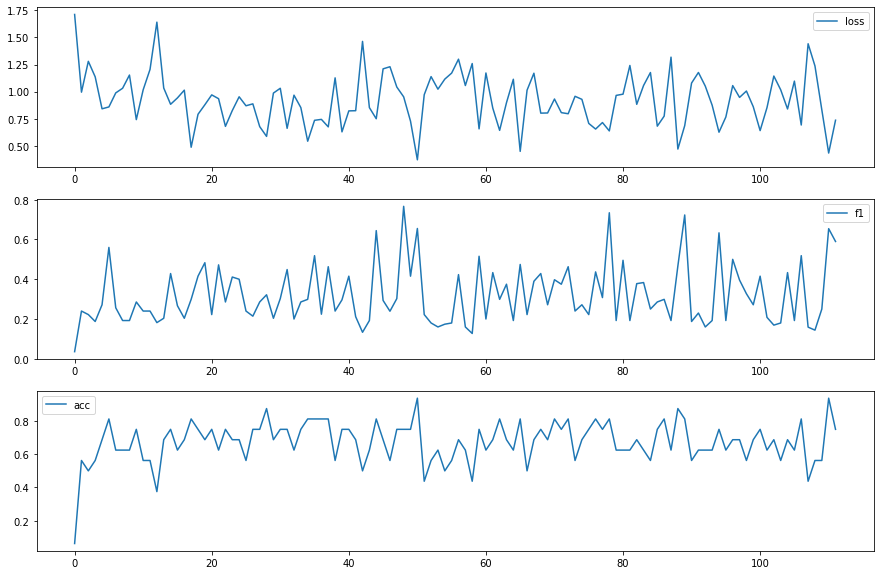

In [11]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(loss_list, label='loss')
plt.legend()
plt.subplot(3,1,2)
plt.plot(f1_list, label='f1')
plt.legend()
plt.subplot(3,1,3)
plt.plot(acc_list, label='acc')
plt.legend()

In [12]:
X_valid, Y_valid = X_valid.to(device), Y_valid.to(device)
model.eval()
Xvl = X_valid
Y_pred = model(Xvl)  
loss = criterion(Y_pred,Y_valid)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_valid.cpu(), Y_pred.cpu(), average='macro')

acc = sum(Y_valid == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:1.21, F1:0.26, Acc:0.62


In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

def CM(Y_true, Y_pred, classes: int):
  fig = plt.figure(figsize=(10, 10))
  cm = confusion_matrix(Y_true, Y_pred)
  lclasses = labels
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmap=plt.cm.Blues
  ax = fig.add_subplot(1,1,1)
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
  ax.set_xlabel("Predicted",size=20)
  ax.set_ylabel("True",size=20)
  ax.set_ylim(classes-0.5, -0.5)

  plt.setp(ax.get_xticklabels(), size=12)
  plt.setp(ax.get_yticklabels(), size=12)

  fmt = '.2f'
  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

  plt.show()

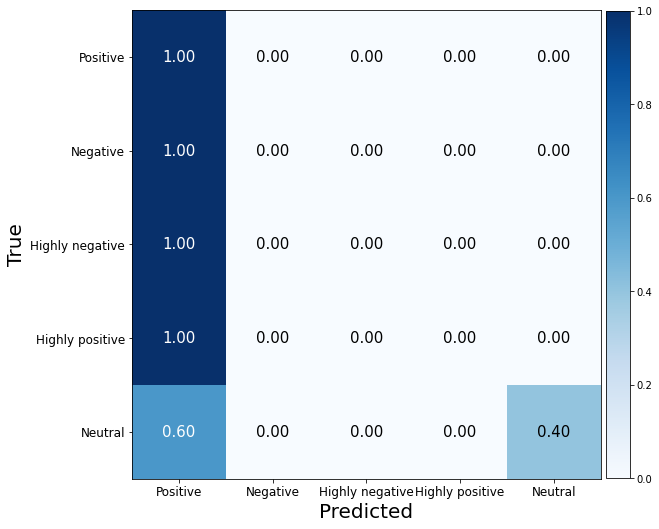

In [14]:
CM(Y_valid.cpu(), Y_pred.cpu(), 5)